In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
titanic_df=pd.read_csv('tested.csv')

In [3]:
print(titanic_df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex  SibSp  Age  Parch  \
0                                Kelly, Mr. James    1      0    7      0   
1                Wilkes, Mrs. James (Ellen Needs)    0      1   10      0   
2                       Myles, Mr. Thomas Francis    1      0   13      0   
3                                Wirz, Mr. Albert    1      0    6      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0      1    5      1   
..                                            ...  ...    ...  ...    ...   
413 

In [4]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Fare']

In [5]:
titanic_df = titanic_df.drop(columns_to_drop, axis=1)

In [6]:
titanic_df.describe()

,Pclass,Sex,SibSp,Age,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.447368,5.339713,0.392344
std,0.841838,0.481622,0.896760,3.332768,0.981429
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,1.000000,0.000000,5.000000,0.000000
75%,3.000000,1.000000,1.000000,7.750000,0.000000
max,3.000000,1.000000,8.000000,16.000000,9.000000


<Axes: >

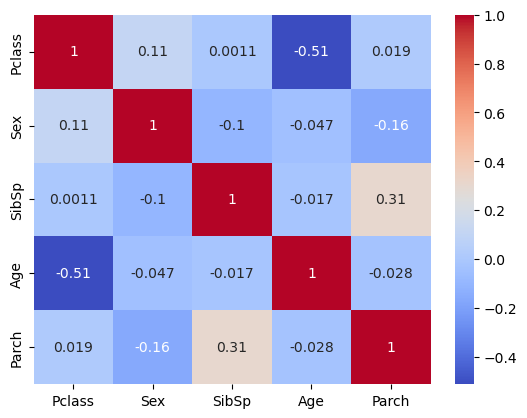

In [7]:
corr_matrix = titanic_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


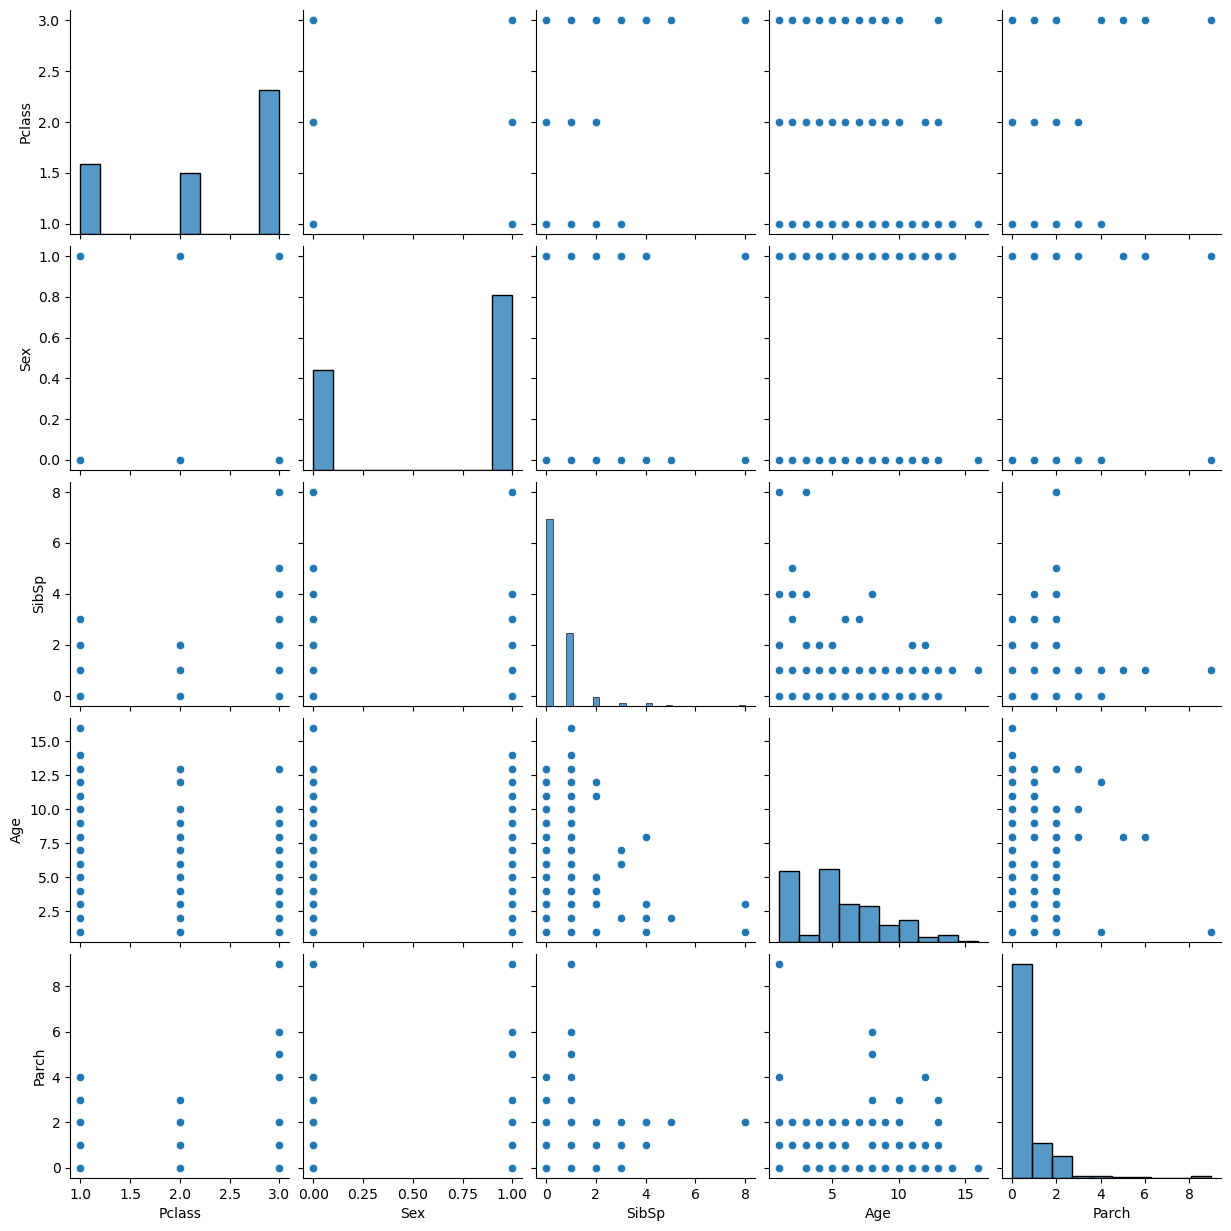

In [8]:
sns.pairplot(titanic_df)

In [9]:
scaling=StandardScaler()
scaled=scaling.fit_transform(titanic_df)

In [10]:
scaled_df=pd.DataFrame(scaled,columns=titanic_df.columns)
scaled_df.head()

,Pclass,Sex,SibSp,Age,Parch
0,0.873482,0.755929,-0.499470,0.498768,-0.400248
1,0.873482,-1.322876,0.616992,1.399999,-0.400248
2,-0.315819,0.755929,-0.499470,2.301231,-0.400248
3,0.873482,0.755929,-0.499470,0.198357,-0.400248
4,0.873482,-1.322876,0.616992,-0.102053,0.619896


<Axes: >

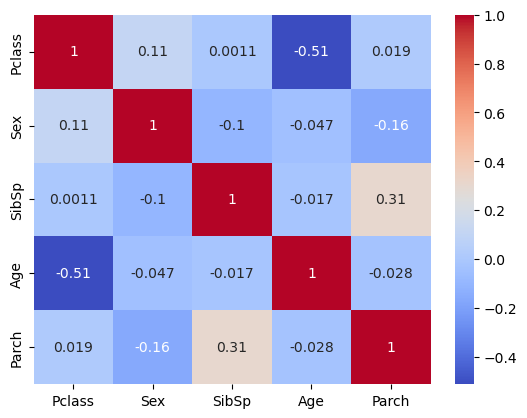

In [11]:
corr_matrix = scaled_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

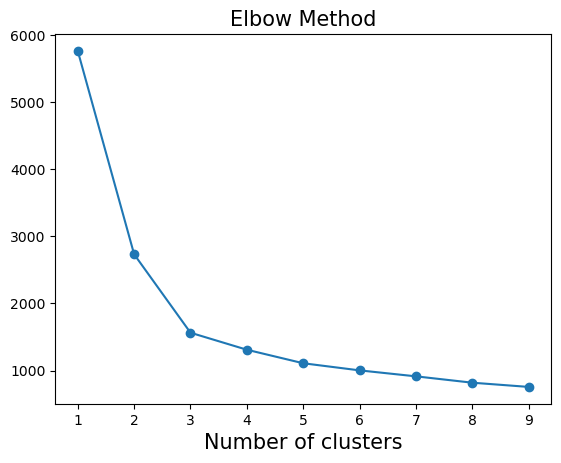

In [12]:
#Plot Elbow Curve
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(titanic_df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.show()

In [13]:
titanic_df.fillna(0)

,Pclass,Sex,SibSp,Age,Parch
0,3,1,0,7,0
1,3,0,1,10,0
2,2,1,0,13,0
3,3,1,0,6,0
4,3,0,1,5,1
...,...,...,...,...,...
413,3,1,0,1,0
414,1,0,0,8,0
415,3,1,0,8,0
416,3,1,0,1,0


In [14]:
titanic_df.describe()

,Pclass,Sex,SibSp,Age,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.447368,5.339713,0.392344
std,0.841838,0.481622,0.896760,3.332768,0.981429
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,1.000000,0.000000,5.000000,0.000000
75%,3.000000,1.000000,1.000000,7.750000,0.000000
max,3.000000,1.000000,8.000000,16.000000,9.000000


/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

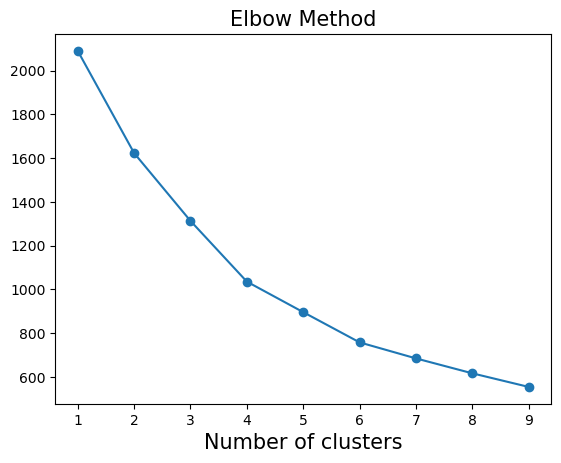

In [15]:
#Plot Elbow Curve
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(scaled_df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(scaled_df)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=123)

In [17]:
pd.Series(kmeans.labels_).value_counts()

0    187
1    117
3     96
4     12
2      6
Name: count, dtype: int64

In [18]:
#Calculate Silhouette Coefficient for K=3

metrics.silhouette_score(scaled_df, kmeans.labels_)

0.3452986336149057

In [19]:
cluster_labels = kmeans.fit_predict(scaled_df)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(titanic_df)
kmeans_df['KMeans_Clusters']=preds
kmeans_df.head(20)

,Pclass,Sex,SibSp,Age,Parch,KMeans_Clusters
0,3,1,0,7,0,0
1,3,0,1,10,0,3
2,2,1,0,13,0,1
3,3,1,0,6,0,0
4,3,0,1,5,1,3
5,3,1,0,3,0,0
6,3,0,0,6,0,3
7,2,1,1,6,1,0
8,3,0,0,4,0,3
9,3,1,2,5,0,0


In [21]:
kmeans_df.to_csv("kmeans.csv", index=False)

In [22]:
kmeans_df.head()

,Pclass,Sex,SibSp,Age,Parch,KMeans_Clusters
0,3,1,0,7,0,0
1,3,0,1,10,0,3
2,2,1,0,13,0,1
3,3,1,0,6,0,0
4,3,0,1,5,1,3


In [24]:
sns.scatterplot(kmeans_df['Pclass'],kmeans_df['Age'], hue='KMeans_Clusters', data=kmeans_df)

plt.title("Pclass vs Age", fontsize=15)
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()


TypeError: scatterplot() got multiple values for argument 'data'